## Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

/Users/tweedles/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/tweedles/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/tweedles/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/tweedles/opt/anaconda3/lib/python3.7/site-packages/ten

## Import data

In [2]:
df = pd.read_csv('TensorFlow_FILES/DATA/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Find Missing Data

In [4]:
# Find missing data by column
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Exploratory Data Analysis

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


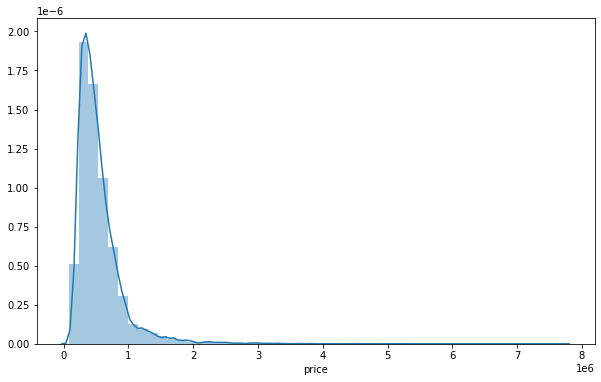

In [6]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

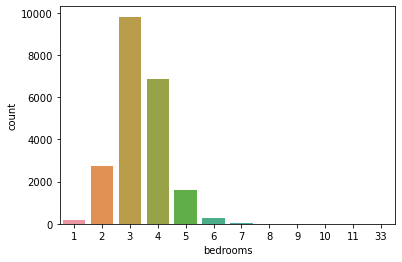

In [8]:
sns.countplot(df['bedrooms'])

In [7]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

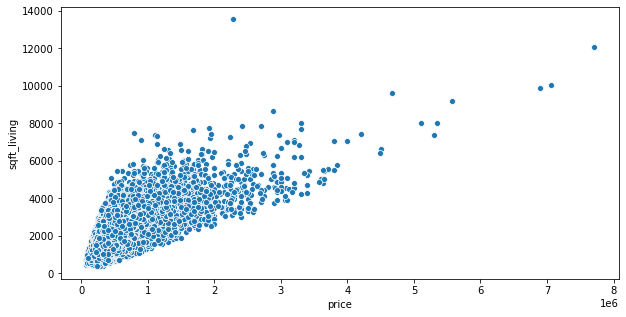

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price', y='sqft_living', data=df)

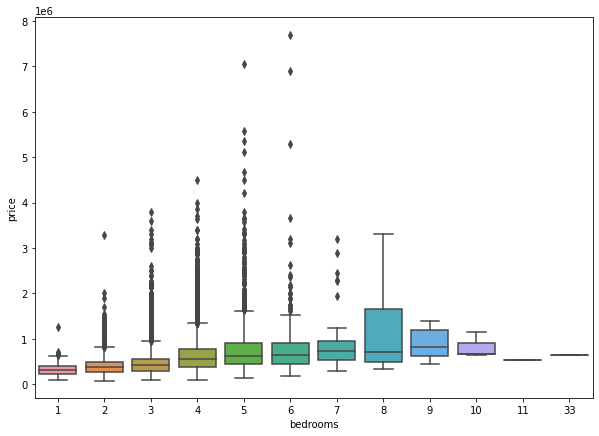

In [10]:
plt.figure(figsize=(10,7))
sns.boxplot(x='bedrooms', y='price', data=df)

In [11]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

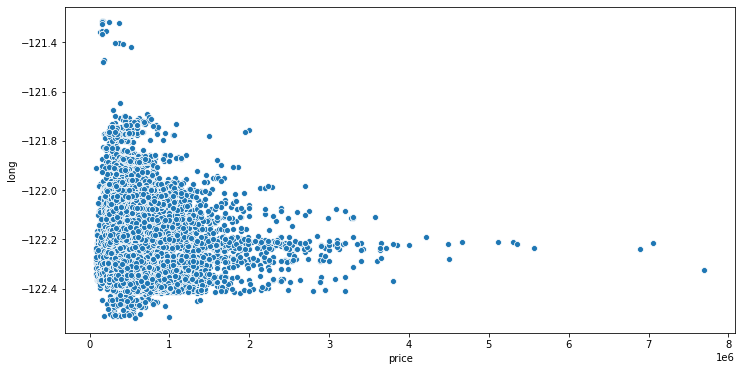

In [12]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='price', y='long', data=df)

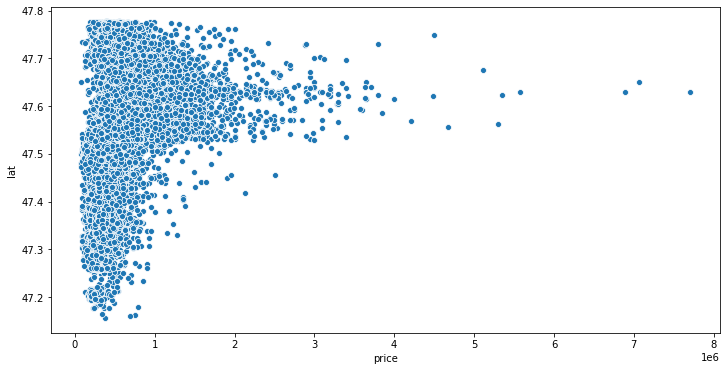

In [13]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='price', y='lat', data=df)

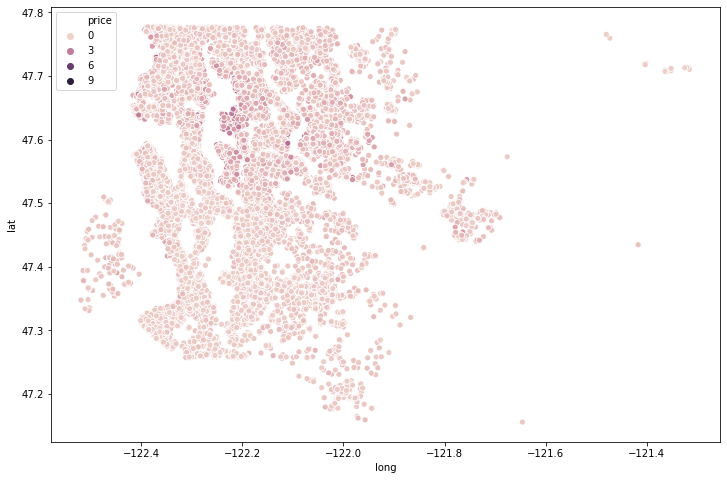

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

In [15]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [16]:
len(df)

21597

In [17]:
len(df)*0.01

215.97

In [18]:
bottom99 = df.sort_values('price', ascending=False).iloc[216:]

In [19]:
len(bottom99)

21381

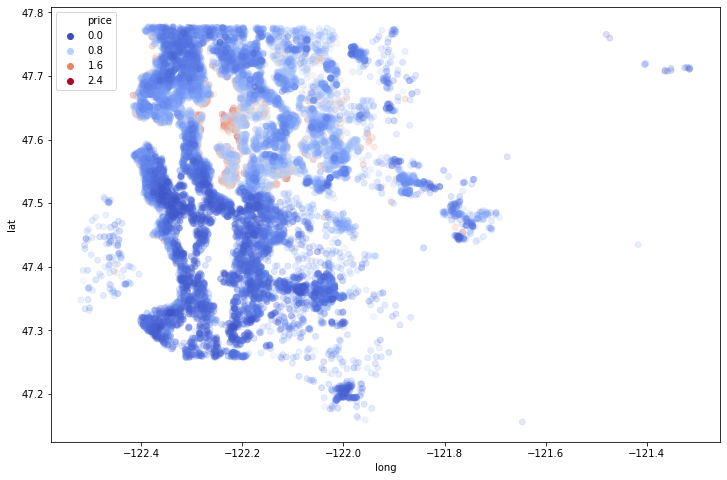

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=bottom99, 
                edgecolor=None, alpha=0.2,
                palette='coolwarm', hue='price')

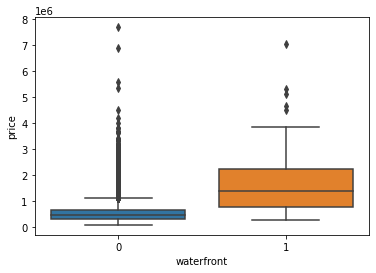

In [21]:
sns.boxplot(x='waterfront', y='price', data=df)

## Feature Engineering

In [43]:
# ID column is useless to us
df = df.drop('id', axis=1)

In [44]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [45]:
df['date'] = pd.to_datetime(df['date'])

In [46]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [47]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [48]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


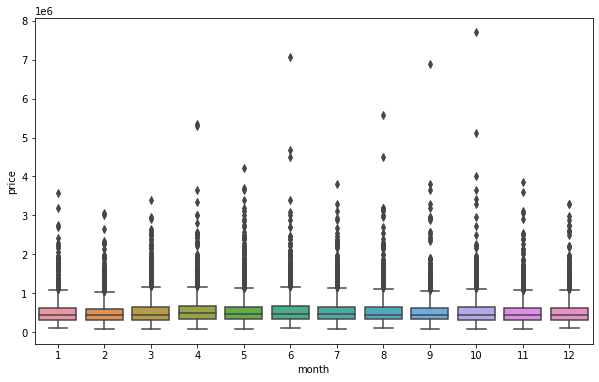

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='price', data=df)

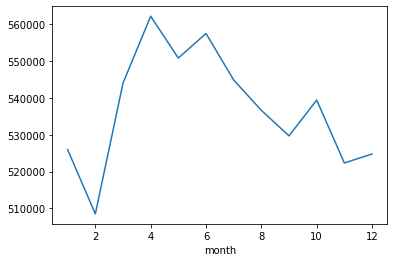

In [51]:
df.groupby('month').mean()['price'].plot()

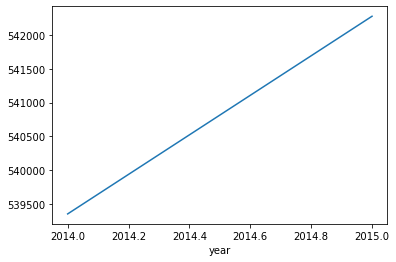

In [52]:
df.groupby('year').mean()['price'].plot()

In [53]:
df = df.drop('date', axis=1)

In [54]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [55]:
# 70 is too many for this tutorial to turn into dummy variables
# it will make there to heavily weighted
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [56]:
df = df.drop('zipcode', axis=1)

In [57]:
#since the price is linear with year we dont need to alter this
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [59]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

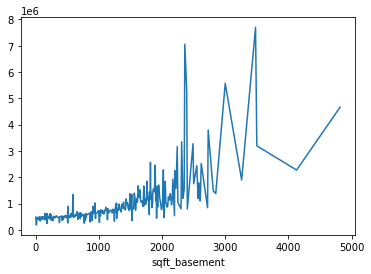

In [62]:
df.groupby('sqft_basement').mean()['price'].plot()

## Scale and Train Test Split

In [63]:
X = df.drop('price', axis = 1).values
y = df['price'].values

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [67]:
scaler = MinMaxScaler()

In [68]:
X_train = scaler.fit_transform(X_train)

In [69]:
X_test = scaler.transform(X_test)

## Model Creation and Training

In [75]:
model = Sequential()

In [73]:
X_train.shape

(15117, 19)

In [76]:
# Since there are 19 features it is probably a good idea to have 19 neurons per layer
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [77]:
# Validation data can be passed into the model fit to help verify the loss
# with larger sets of data, the batch size arg helps prevent overfitting
model.fit(x=X_train, y=y_train, 
          validation_data=(X_test, y_test),
         batch_size=128, epochs=400)

Instructions for updating:
Use tf.cast instead.
Train on 15117 samples, validate on 6480 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/400
15117/15117 [==============================] - 1s 38us/sample - loss: 430240493727.5915 - val_loss: 418923942970.1531
Epoch 2/400
15117/15117 [==============================] - 0s 12us/sample - loss: 429435024373.6360 - val_loss: 416198050884.2667
Epoch 3/400
15117/15117 [==============================] - 0s 13us/sample - loss: 418759279875.2345 - val_loss: 391830153575.0321
Epoch 4/400
15117/15117 [==============================] - 0s 13us/sample - loss: 365054805259.9050 - val_loss: 301617076471.7827
Epoch 5/400
15117/15117 [==============================] - 0s 17us/sample - loss: 237926919211.4203 - val_loss: 157076888507.7333
Epoch 6/400
15117/15117 [==============================] - 0s 16us/sample - loss: 122738077338.2063 - val_loss: 97987675123.3580
Epoch 7/400
15117/15117 [==============================] - 0s 16us/sample - 

Epoch 60/400
15117/15117 [==============================] - 0s 18us/sample - loss: 42393982011.6774 - val_loss: 41318709313.7383
Epoch 61/400
15117/15117 [==============================] - 0s 19us/sample - loss: 42220274529.2891 - val_loss: 41121415623.1111
Epoch 62/400
15117/15117 [==============================] - 0s 19us/sample - loss: 41998156148.6962 - val_loss: 40912099869.0765
Epoch 63/400
15117/15117 [==============================] - 0s 20us/sample - loss: 41782344921.7448 - val_loss: 40684819883.2988
Epoch 64/400
15117/15117 [==============================] - 0s 20us/sample - loss: 41586640867.8209 - val_loss: 40450923224.1778
Epoch 65/400
15117/15117 [==============================] - 0s 19us/sample - loss: 41320893088.7091 - val_loss: 40201038360.0198
Epoch 66/400
15117/15117 [==============================] - 0s 21us/sample - loss: 41127826918.3949 - val_loss: 39959413631.0518
Epoch 67/400
15117/15117 [==============================] - 0s 15us/sample - loss: 40877331192.56

15117/15117 [==============================] - 0s 12us/sample - loss: 32246552911.1691 - val_loss: 30641460949.6494
Epoch 187/400
15117/15117 [==============================] - 0s 14us/sample - loss: 32234389235.4853 - val_loss: 30591403308.8790
Epoch 188/400
15117/15117 [==============================] - 0s 12us/sample - loss: 32208866697.4918 - val_loss: 30568307580.5235
Epoch 189/400
15117/15117 [==============================] - 0s 12us/sample - loss: 32179153875.6314 - val_loss: 30544626634.9037
Epoch 190/400
15117/15117 [==============================] - 0s 14us/sample - loss: 32127566183.5549 - val_loss: 30514408683.1407
Epoch 191/400
15117/15117 [==============================] - 0s 13us/sample - loss: 32102308498.0099 - val_loss: 30483602930.0938
Epoch 192/400
15117/15117 [==============================] - 0s 11us/sample - loss: 32090538646.2774 - val_loss: 30478954496.0000
Epoch 193/400
15117/15117 [==============================] - 0s 11us/sample - loss: 32071847171.5055 - v

15117/15117 [==============================] - 0s 12us/sample - loss: 30549076135.7878 - val_loss: 28612162345.0864
Epoch 313/400
15117/15117 [==============================] - 0s 13us/sample - loss: 30601430108.5305 - val_loss: 28511465795.6346
Epoch 314/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30556184998.3145 - val_loss: 28530413487.0914
Epoch 315/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30530850451.2970 - val_loss: 28527881648.3556
Epoch 316/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30542148587.8817 - val_loss: 28602150178.7654
Epoch 317/400
15117/15117 [==============================] - 0s 13us/sample - loss: 30552181613.2111 - val_loss: 28502326921.7975
Epoch 318/400
15117/15117 [==============================] - 0s 13us/sample - loss: 30526581336.4324 - val_loss: 28474441232.4346
Epoch 319/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30494500987.3515 - v

In [80]:
losses = pd.DataFrame(model.history.history)

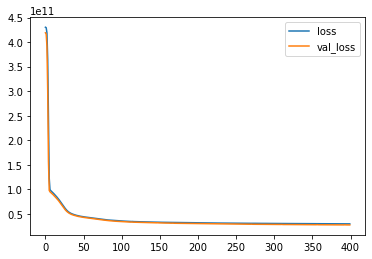

In [81]:
# this shows that there is no drift of the validation loss from the training loss
# IE no overfitting
losses.plot()

In [84]:
predictions = model.predict(X_test)

In [87]:
np.sqrt(mean_squared_error(y_test, predictions))

166435.15414602627

In [88]:
mean_absolute_error(y_test, predictions)

103499.97296428916

In [89]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [90]:
5.402966e+05

540296.6

In [91]:
# one is the best possible score
explained_variance_score(y_test, predictions)

0.7913338832048842

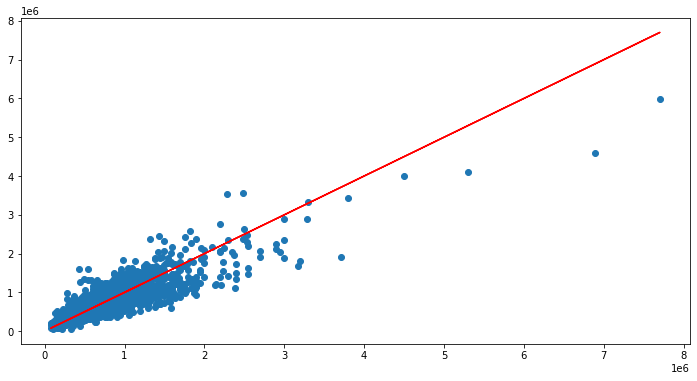

In [94]:
# this shows that those outliers are are skewing the model drastically
plt.figure(figsize = (12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [97]:
single_house = df.drop('price', axis=1).iloc[0]

In [98]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [99]:
single_house.values.reshape(-1, 19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [100]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [101]:
model.predict(single_house)

array([[294276.7]], dtype=float32)

In [102]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


# Repeating the work on the bottom99 set

## Feature engineering

In [22]:
# ID column is useless to us
bottom99 = bottom99.drop('id', axis=1)

In [23]:
bottom99['date']

6329       6/2/2014
12271    10/15/2014
9166      2/13/2015
12565     4/22/2015
1150      4/21/2015
            ...    
2139       5/8/2014
8267      11/5/2014
16184     3/24/2015
465       5/23/2014
15279      5/6/2014
Name: date, Length: 21381, dtype: object

In [24]:
bottom99['date'] = pd.to_datetime(bottom99['date'])

In [25]:
bottom99['date']

6329    2014-06-02
12271   2014-10-15
9166    2015-02-13
12565   2015-04-22
1150    2015-04-21
           ...    
2139    2014-05-08
8267    2014-11-05
16184   2015-03-24
465     2014-05-23
15279   2014-05-06
Name: date, Length: 21381, dtype: datetime64[ns]

In [26]:
bottom99['year'] = bottom99['date'].apply(lambda date: date.year)
bottom99['month'] = bottom99['date'].apply(lambda date: date.month)

In [27]:
bottom99.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
6329,2014-06-02,1970000.0,4,3.50,4370,8510,2.0,0,1,3,...,760,2003,0,98004,47.5876,-122.204,2960,10347,2014,6
12271,2014-10-15,1960000.0,5,4.50,6200,23373,3.0,0,1,4,...,1150,1988,0,98040,47.5632,-122.215,3700,14486,2014,10
9166,2015-02-13,1960000.0,3,1.75,3330,12566,1.0,1,4,4,...,1390,1960,0,98040,47.5287,-122.220,3730,16560,2015,2
12565,2015-04-22,1960000.0,4,4.00,4430,31353,2.0,0,0,3,...,0,1998,0,98005,47.6422,-122.157,3900,35237,2015,4
1150,2015-04-21,1960000.0,4,2.75,3120,7898,1.0,1,4,4,...,1560,1963,0,98034,47.7165,-122.259,2630,13868,2015,4


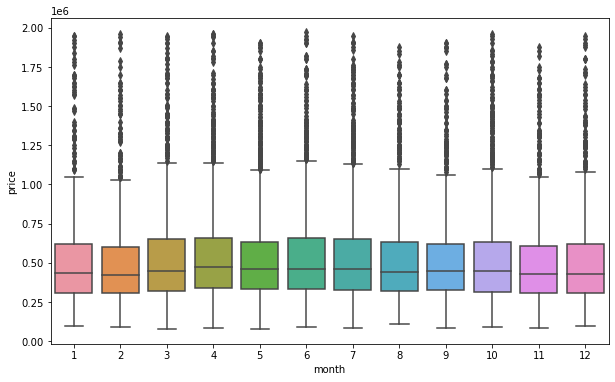

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='price', data=bottom99)

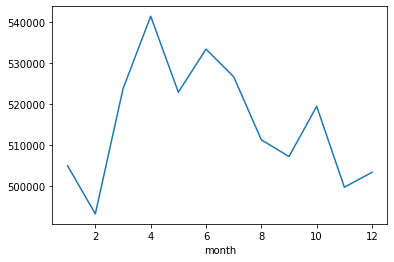

In [29]:
bottom99.groupby('month').mean()['price'].plot()

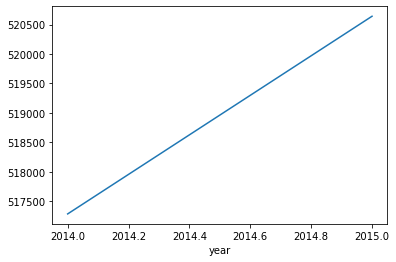

In [30]:
bottom99.groupby('year').mean()['price'].plot()

In [31]:
bottom99 = bottom99.drop('date', axis=1)

In [32]:
bottom99.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
6329,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,...,760,2003,0,98004,47.5876,-122.204,2960,10347,2014,6
12271,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,...,1150,1988,0,98040,47.5632,-122.215,3700,14486,2014,10
9166,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,...,1390,1960,0,98040,47.5287,-122.220,3730,16560,2015,2
12565,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,...,0,1998,0,98005,47.6422,-122.157,3900,35237,2015,4
1150,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,...,1560,1963,0,98034,47.7165,-122.259,2630,13868,2015,4


In [33]:
# 70 is too many for this tutorial to turn into dummy variables
# it will make there to heavily weighted
bottom99['zipcode'].value_counts()

98103    602
98038    589
98115    582
98052    573
98117    553
        ... 
98010    100
98102     99
98024     80
98148     57
98039     29
Name: zipcode, Length: 70, dtype: int64

In [34]:
bottom99 = bottom99.drop('zipcode', axis=1)

In [35]:
#since the price is linear with year we dont need to alter this
bottom99['yr_renovated'].value_counts()

0       20499
2014       91
2013       36
2007       34
2000       34
        ...  
1959        1
1954        1
1948        1
1944        1
1951        1
Name: yr_renovated, Length: 70, dtype: int64

In [36]:
bottom99['sqft_basement'].value_counts()

0       13052
600       219
700       214
500       214
800       205
        ...  
2610        1
2850        1
915         1
20          1
1135        1
Name: sqft_basement, Length: 292, dtype: int64

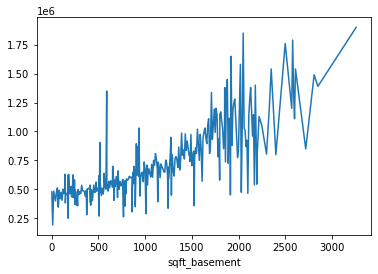

In [37]:
bottom99.groupby('sqft_basement').mean()['price'].plot()

## Scale and Train Test Split

In [38]:
X = bottom99.drop('price', axis = 1).values
y = bottom99['price'].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
scaler = MinMaxScaler()

In [41]:
X_train = scaler.fit_transform(X_train)

In [42]:
X_test = scaler.transform(X_test)

## Model Creation and Training

In [43]:
model = Sequential()

In [44]:
X_train.shape

(14966, 19)

In [45]:
# Since there are 19 features it is probably a good idea to have 19 neurons per layer
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [46]:
# Validation data can be passed into the model fit to help verify the loss
# with larger sets of data, the batch size arg helps prevent overfitting
model.fit(x=X_train, y=y_train, 
          validation_data=(X_test, y_test),
         batch_size=128, epochs=400)

Instructions for updating:
Use tf.cast instead.
Train on 14966 samples, validate on 6415 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/400
14966/14966 [==============================] - 1s 34us/sample - loss: 346866348686.1120 - val_loss: 356811560833.2571
Epoch 2/400
14966/14966 [==============================] - 0s 11us/sample - loss: 345470084246.6647 - val_loss: 351960021121.9355
Epoch 3/400
14966/14966 [==============================] - 0s 11us/sample - loss: 326976122651.7451 - val_loss: 309087378724.2750
Epoch 4/400
14966/14966 [==============================] - 0s 11us/sample - loss: 242136584275.7482 - val_loss: 174862267618.8284
Epoch 5/400
14966/14966 [==============================] - 0s 11us/sample - loss: 103987876295.4152 - val_loss: 63666540692.1328
Epoch 6/400
14966/14966 [==============================] - 0s 11us/sample - loss: 56011113421.2311 - val_loss: 55268686885.5121
Epoch 7/400
14966/14966 [==============================] - 0s 11us/sample - lo

Epoch 60/400
14966/14966 [==============================] - 0s 14us/sample - loss: 24068589514.9047 - val_loss: 24683166801.8083
Epoch 61/400
14966/14966 [==============================] - 0s 13us/sample - loss: 24016081821.8832 - val_loss: 24642450194.3171
Epoch 62/400
14966/14966 [==============================] - 0s 11us/sample - loss: 23995900906.7893 - val_loss: 24690310120.5350
Epoch 63/400
14966/14966 [==============================] - 0s 13us/sample - loss: 23935684689.2850 - val_loss: 24570206081.5763
Epoch 64/400
14966/14966 [==============================] - 0s 13us/sample - loss: 23886328925.4641 - val_loss: 24535805269.8388
Epoch 65/400
14966/14966 [==============================] - 0s 13us/sample - loss: 23846454076.9980 - val_loss: 24476302689.4117
Epoch 66/400
14966/14966 [==============================] - 0s 12us/sample - loss: 23790773305.0637 - val_loss: 24524702068.3274
Epoch 67/400
14966/14966 [==============================] - 0s 14us/sample - loss: 23765617955.88

14966/14966 [==============================] - 0s 13us/sample - loss: 21822052306.2943 - val_loss: 22713630663.1732
Epoch 124/400
14966/14966 [==============================] - 0s 13us/sample - loss: 21791920256.6329 - val_loss: 22658572939.2736
Epoch 125/400
14966/14966 [==============================] - 0s 12us/sample - loss: 21772529846.6861 - val_loss: 22716324395.8173
Epoch 126/400
14966/14966 [==============================] - 0s 14us/sample - loss: 21756401457.0926 - val_loss: 22609387408.2619
Epoch 127/400
14966/14966 [==============================] - 0s 14us/sample - loss: 21720794940.5875 - val_loss: 22590696938.2111
Epoch 128/400
14966/14966 [==============================] - 0s 13us/sample - loss: 21711137180.1727 - val_loss: 22642114731.7574
Epoch 129/400
14966/14966 [==============================] - 0s 12us/sample - loss: 21676670952.7366 - val_loss: 22581174218.4455
Epoch 130/400
14966/14966 [==============================] - 0s 13us/sample - loss: 21644950977.5309 - v

14966/14966 [==============================] - 0s 12us/sample - loss: 21026029444.1566 - val_loss: 22002548165.0182
Epoch 187/400
14966/14966 [==============================] - 0s 12us/sample - loss: 21015728663.6055 - val_loss: 21965475008.3492
Epoch 188/400
14966/14966 [==============================] - 0s 12us/sample - loss: 21013946351.3051 - val_loss: 21989457391.3191
Epoch 189/400
14966/14966 [==============================] - 0s 12us/sample - loss: 21017768556.1748 - val_loss: 22177177182.0995
Epoch 190/400
14966/14966 [==============================] - 0s 14us/sample - loss: 21058472003.3270 - val_loss: 21951510377.9517
Epoch 191/400
14966/14966 [==============================] - 0s 13us/sample - loss: 20991766927.3094 - val_loss: 22046864990.0995
Epoch 192/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20998271140.4859 - val_loss: 21956042317.8176
Epoch 193/400
14966/14966 [==============================] - 0s 13us/sample - loss: 20999029289.1215 - v

14966/14966 [==============================] - 0s 13us/sample - loss: 20870662412.7607 - val_loss: 21812993742.1568
Epoch 250/400
14966/14966 [==============================] - 0s 15us/sample - loss: 20846291267.7717 - val_loss: 21760305345.4666
Epoch 251/400
14966/14966 [==============================] - 0s 15us/sample - loss: 20831853912.9825 - val_loss: 21751277758.5933
Epoch 252/400
14966/14966 [==============================] - 0s 13us/sample - loss: 20842627661.7955 - val_loss: 21769039750.5247
Epoch 253/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20854738645.9548 - val_loss: 21772054764.2463
Epoch 254/400
14966/14966 [==============================] - 0s 11us/sample - loss: 20843943409.6999 - val_loss: 21873095971.7961
Epoch 255/400
14966/14966 [==============================] - 0s 11us/sample - loss: 20846099450.3894 - val_loss: 21751428395.6178
Epoch 256/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20828195360.0898 - v

14966/14966 [==============================] - 0s 12us/sample - loss: 20735146798.7663 - val_loss: 21638023429.4672
Epoch 313/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20724197447.9797 - val_loss: 21645978266.5977
Epoch 314/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20722067915.7942 - val_loss: 21792175027.6988
Epoch 315/400
14966/14966 [==============================] - 0s 11us/sample - loss: 20744344900.1823 - val_loss: 21630672479.6957
Epoch 316/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20758841657.9190 - val_loss: 21628701012.6416
Epoch 317/400
14966/14966 [==============================] - 0s 11us/sample - loss: 20723387230.3878 - val_loss: 21636451340.6104
Epoch 318/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20702044321.4753 - val_loss: 21643689253.2327
Epoch 319/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20709588033.5480 - v

14966/14966 [==============================] - 0s 12us/sample - loss: 20642109572.4645 - val_loss: 21595721259.3384
Epoch 376/400
14966/14966 [==============================] - 0s 14us/sample - loss: 20654611452.8526 - val_loss: 21569075016.1110
Epoch 377/400
14966/14966 [==============================] - 0s 13us/sample - loss: 20660942620.9766 - val_loss: 21590573542.5397
Epoch 378/400
14966/14966 [==============================] - 0s 13us/sample - loss: 20649190764.1406 - val_loss: 21550529847.3503
Epoch 379/400
14966/14966 [==============================] - 0s 11us/sample - loss: 20640452072.1208 - val_loss: 21555685597.5607
Epoch 380/400
14966/14966 [==============================] - 0s 11us/sample - loss: 20647167884.2304 - val_loss: 21547793967.6483
Epoch 381/400
14966/14966 [==============================] - 0s 13us/sample - loss: 20651253053.0664 - val_loss: 21582219758.5210
Epoch 382/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20658394860.9445 - v

In [47]:
losses = pd.DataFrame(model.history.history)

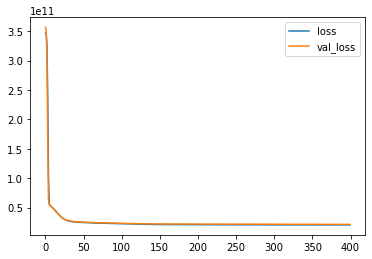

In [48]:
# this shows that there is no drift of the validation loss from the training loss
# IE no overfitting
losses.plot()

In [49]:
predictions = model.predict(X_test)

In [50]:
np.sqrt(mean_squared_error(y_test, predictions))

146746.16938586827

In [51]:
mean_absolute_error(y_test, predictions)

98708.38312670498

In [52]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [90]:
5.402966e+05

540296.6

In [53]:
# one is the best possible score
explained_variance_score(y_test, predictions)

0.7386223448360858

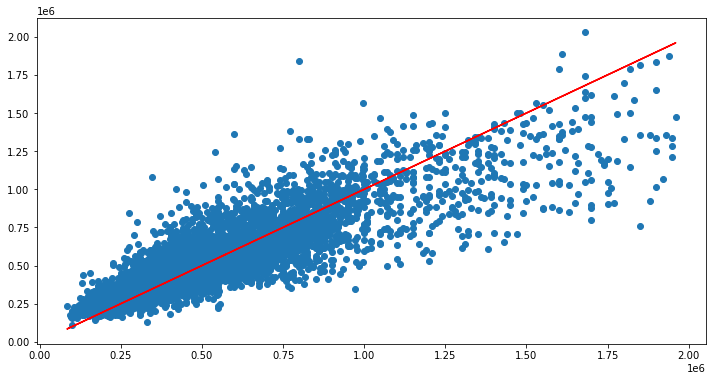

In [54]:
# this shows that those outliers are are skewing the model drastically
plt.figure(figsize = (12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [58]:
single_house = bottom99.drop('price', axis=1).iloc[0]

In [59]:
single_house.values

array([ 4.00000e+00,  3.50000e+00,  4.37000e+03,  8.51000e+03,
        2.00000e+00,  0.00000e+00,  1.00000e+00,  3.00000e+00,
        1.00000e+01,  3.61000e+03,  7.60000e+02,  2.00300e+03,
        0.00000e+00,  4.75876e+01, -1.22204e+02,  2.96000e+03,
        1.03470e+04,  2.01400e+03,  6.00000e+00])

In [60]:
single_house.values.reshape(-1, 19)

array([[ 4.00000e+00,  3.50000e+00,  4.37000e+03,  8.51000e+03,
         2.00000e+00,  0.00000e+00,  1.00000e+00,  3.00000e+00,
         1.00000e+01,  3.61000e+03,  7.60000e+02,  2.00300e+03,
         0.00000e+00,  4.75876e+01, -1.22204e+02,  2.96000e+03,
         1.03470e+04,  2.01400e+03,  6.00000e+00]])

In [61]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [62]:
model.predict(single_house)

array([[1104596.5]], dtype=float32)

In [64]:
bottom99.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
6329,1970000.0,4,3.5,4370,8510,2.0,0,1,3,10,3610,760,2003,0,47.5876,-122.204,2960,10347,2014,6
